# Анализ статистики Амазон

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Первичная обработка данных
### 1.1 Загрузка датасета

Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [40]:
#Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Настройка отображения данных
pd.set_option("display.max_columns", None)  # Показывать все столбцы
pd.set_option("display.max_rows", 20)       # Ограничить количество строк для отображения
pd.set_option("display.float_format", "{:.2f}".format)  # Формат чисел: 2 знака после запятой
pd.set_option("display.width", 1000)        # Увеличить ширину вывода для удобства

#Загрузка датафрейма
df = pd.read_csv('/content/drive/MyDrive/Zerocoder/01_Профессии/01_Pyhton для Аналитиков данных/Pynton PN/PN14 Проект в портфолио/netflix_users_data.csv')

In [41]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


### 1.2 Приведение столбцов к стилю camel_case

In [42]:
def to_camel_case(column_name):
    # Разбиваем строку на слова
    words = re.findall(r'[A-Za-z0-9]+', column_name)

    # Приводим первое слово к нижнему регистру, остальные - с заглавной буквы
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию to_camel_case ко всем названиям столбцов
df.columns = [to_camel_case(col) for col in df.columns]

# Выводим новые названия столбцов
print("Новые названия столбцов:")
print(df.columns.tolist())

Новые названия столбцов:
['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate', 'lastPaymentDate', 'country', 'age', 'gender', 'device', 'planDuration']


### 1.3 Приведение типов данных

In [43]:
df['joinDate'] = pd.to_datetime(df['joinDate'], errors='coerce')
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], errors='coerce')
# Проверяем результат
print(df['joinDate'].dtype)
print(df['joinDate'].head())

print(df['lastPaymentDate'].dtype)
print(df['lastPaymentDate'].head())

datetime64[ns]
0   2022-01-15
1   2021-05-09
2   2023-02-28
3   2022-10-07
4   2023-01-05
Name: joinDate, dtype: datetime64[ns]
datetime64[ns]
0   2023-10-06
1   2023-06-22
2   2023-06-27
3   2023-06-26
4   2023-06-28
Name: lastPaymentDate, dtype: datetime64[ns]


<ipython-input-43-4145593840>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['joinDate'] = pd.to_datetime(df['joinDate'], errors='coerce')
<ipython-input-43-4145593840>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], errors='coerce')


### 1.4 Поиск дублей и пропусков в данных

In [44]:
def analyze_data(df):
    # Поиск дублей
    duplicates = df.duplicated().sum()
    print(f"Полных дубликатов строк: {duplicates}")

    # Поиск пропусков
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nПропущенные значения:")
        print(missing[missing > 0])
    else:
        print("\nПропущенные значения отсутствуют.")

# Пример использования функции
analyze_data(df)


Полных дубликатов строк: 0

Пропущенные значения отсутствуют.


# 2. Исследовательский анализ данных

In [45]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


### 2.1 Подсчёт количества уникальных пользователей

In [46]:
# Подсчет количества уникальных пользователей
unique_userId = df['userId'].nunique()
print(f"Количество уникальных пользователей: {unique_userId}")

Количество уникальных пользователей: 2500


Общее количество уникальных пользователей:

2500 пользователей.

**Вывод:**

Это указывает на стабильную базу клиентов, что важно для поддержания постоянной выручки.

Рекомендации:

Сосредоточиться на удержании существующих пользователей через программы лояльности и улучшение сервиса.

Разработать стратегии для привлечения новых пользователей, чтобы увеличить общую базу клиентов.

### 2.2 Обзор возраста пользователей

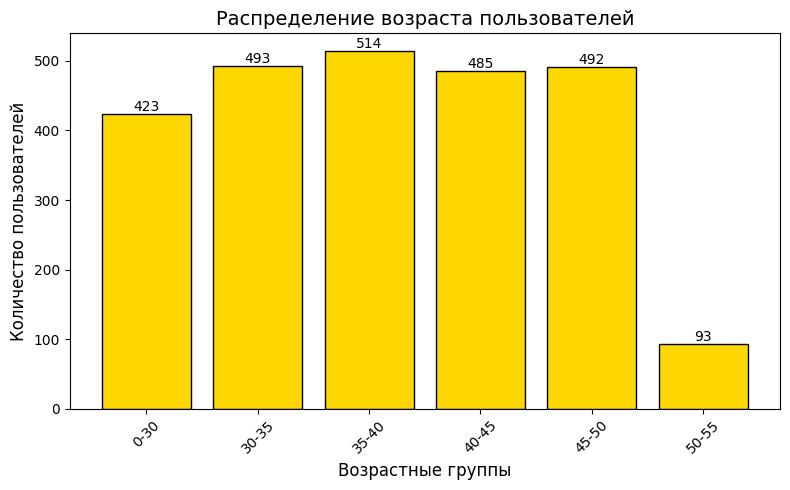

In [47]:
# Создание возрастных корзин
bins = [0, 30, 35, 40, 45, 50, 55]
labels = ['0-30', '30-35', '35-40', '40-45', '45-50', '50-55']

df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

# Группировка данных по возрастным корзинам
age_distribution = df['ageGroup'].value_counts().sort_index()

# Построение гистограммы
plt.figure(figsize=(8, 5))
bars = plt.bar(age_distribution.index.astype(str), age_distribution.values, color='#FFD700', edgecolor='black')  # Жёлтый цвет
plt.title('Распределение возраста пользователей', fontsize=14)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)

# Добавление подписей к столбцам без дробной части и с разделителем разрядов пробелом
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



Основные возрастные группы:

Самая многочисленная группа — 35–40 лет (514 пользователей).

Группы 30–35 лет (493) и 45–50 лет (492) также имеют значительное количество пользователей.

Наименьшее количество пользователей в возрастной группе 50–55 лет (93 человека).

Тренды:

Основная часть пользователей сосредоточена в возрастных группах от 30 до 50 лет, что указывает на зрелую аудиторию сервиса.

Группа 0–30 лет (423 пользователя) также имеет значительное представительство, что может свидетельствовать о популярности среди молодых пользователей.

Рекомендации:

Сосредоточить маркетинговые усилия на группах 35–40 лет и 30–35 лет, так как они составляют основную часть аудитории.

Разработать стратегию привлечения более молодой аудитории (группа 0–30 лет) через социальные сети и студенческие программы.

Провести анализ потребностей возрастной группы 50–55 лет, чтобы увеличить её вовлечённость.

### 2.3 Анализ пола пользователей

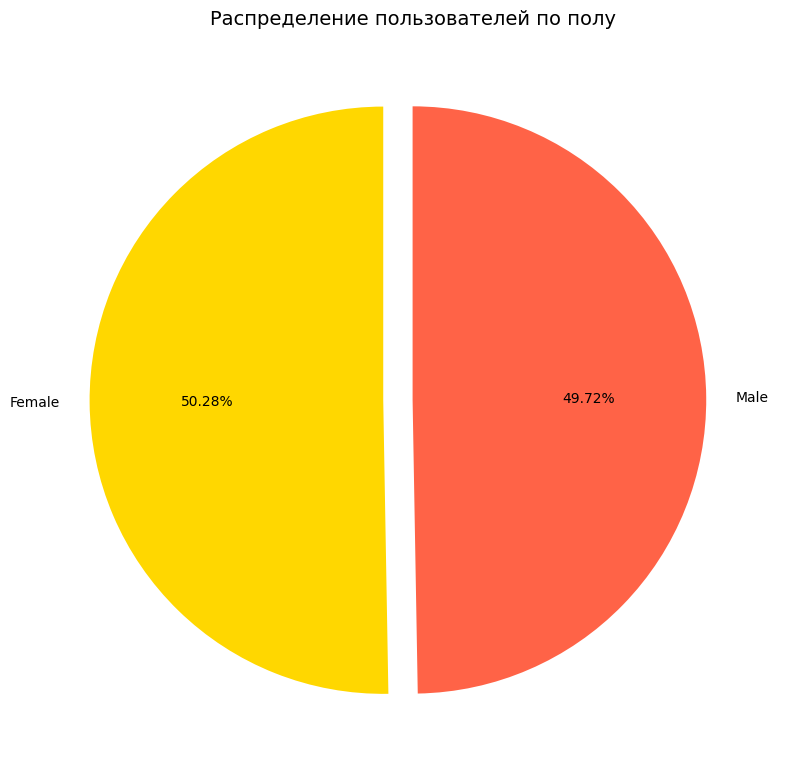

In [48]:
# Расчет распределения пользователей по полу
gender_distribution = df['gender'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    gender_distribution.values,
    labels=gender_distribution.index,
    autopct=lambda p: f'{p:.2f}%',  # Доли с двумя знаками после запятой
    startangle=90,
    colors=['#FFD700', '#FF6347'],  # Жёлтый и красный цвета
    explode=[0.1, 0]  # Выделение первого сегмента
)
plt.title('Распределение пользователей по полу', fontsize=14)
plt.tight_layout()
plt.show()

Основное распределение:

Женщины (Female) составляют 50.28% от общей аудитории.

Мужчины (Male) составляют 49.72%.

Тренды:

Аудитория сервиса распределена практически поровну между мужчинами и женщинами, что свидетельствует о равномерной популярности среди обоих полов.

Рекомендации:

При разработке маркетинговых стратегий учитывать равномерное распределение полов.

Создавать контент, который будет интересен как мужчинам, так и женщинам, чтобы поддерживать баланс аудитории.

Провести дополнительный анализ предпочтений контента для каждой группы, чтобы выявить возможные различия в интересах.

### 2.4 Анализ девайсов пользователя

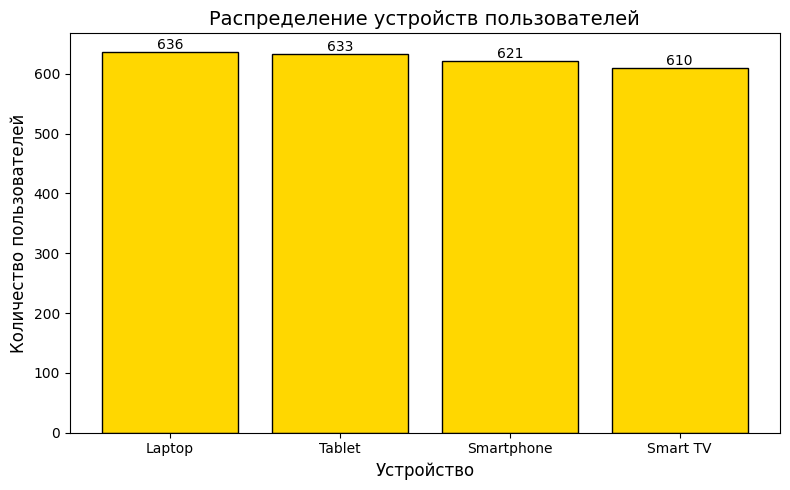

In [49]:
# Подсчет распределения устройств и сортировка по убыванию
device_distribution = df['device'].value_counts().sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
bars = plt.bar(device_distribution.index, device_distribution.values, color='#FFD700', edgecolor='black')  # Жёлтый цвет
plt.title('Распределение устройств пользователей', fontsize=14)
plt.xlabel('Устройство', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Добавление подписей к столбцам без дробной части и с разделителем разрядов пробелом
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


1. Основное распределение:

Laptop — наиболее популярное устройство среди пользователей (636 человек).

Tablet занимает второе место с небольшим отставанием (633 человека).

Smartphone используется 621 пользователем, что делает его третьим по популярности.

Smart TV — наименее популярное устройство, но всё ещё активно используется (610 пользователей).

2. Тренды:

Устройства распределены достаточно равномерно, без явного лидера или аутсайдера.

Популярность ноутбуков и планшетов может быть связана с удобством использования для просмотра контента.

3. Рекомендации:

Сосредоточить усилия на улучшении пользовательского опыта на ноутбуках, так как они занимают лидирующую позицию.

Разработать стратегии для увеличения вовлечённости пользователей Smart TV, например, улучшить интерфейс приложения для телевизоров или предложить эксклюзивный контент.

Поддерживать оптимизацию мобильного приложения для смартфонов и планшетов, учитывая их значительную долю среди устройств.

### 2.5 Типы подписок

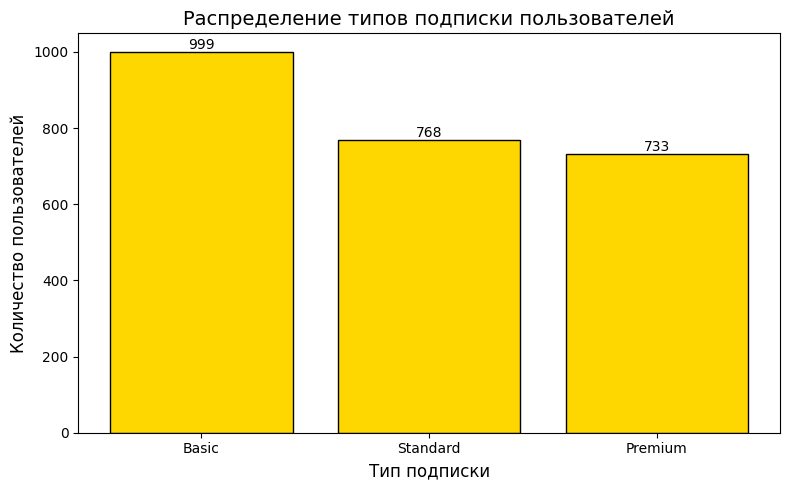

In [50]:
# Подсчет распределения типов подписки и сортировка по убыванию
type_distribution = df['subscriptionType'].value_counts().sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
bars = plt.bar(type_distribution.index, type_distribution.values, color='#FFD700', edgecolor='black')  # Жёлтый цвет
plt.title('Распределение типов подписки пользователей', fontsize=14)
plt.xlabel('Тип подписки', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Добавление подписей к столбцам без дробной части и с разделителем разрядов пробелом
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Выводы по распределению типов подписки пользователей

1. Основное распределение:

Basic — самый популярный тип подписки, его выбрали 999 пользователей.

Standard — занимает второе место с 768 пользователями.

Premium — на третьем месте, его выбрали 733 пользователя.

2. Тренды:

Тариф "Basic" лидирует, что может быть связано с его доступной ценой или минимальными требованиями к функционалу.

Разница между тарифами "Standard" и "Premium" незначительна, что указывает на схожую популярность этих планов среди пользователей.

3. Рекомендации:

Продолжить продвижение тарифа "Basic" как доступного решения, чтобы сохранить его лидерство.

Увеличить привлекательность тарифов "Standard" и "Premium" за счёт добавления уникальных функций или контента.

Провести анализ причин выбора тарифа "Basic", чтобы понять, какие факторы делают его наиболее популярным.

### 2.6 Анализ локации пользователей

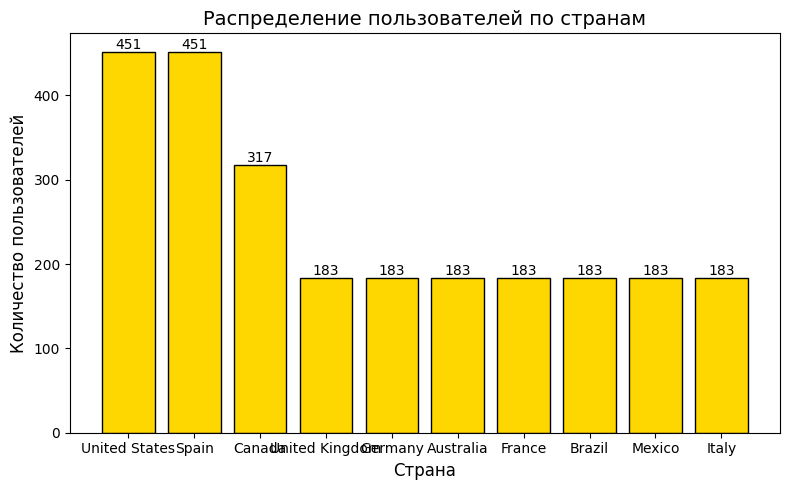

In [51]:
# Подсчет уникальных пользователей по странам
country_distribution = df['country'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
bars = plt.bar(country_distribution.index, country_distribution.values, color='#FFD700', edgecolor='black')  # Жёлтый цвет
plt.title('Распределение пользователей по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# Добавление подписей к столбцам без дробной части и с разделителем разрядов пробелом
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Выводы по распределению пользователей по странам

1. Основное распределение:

United States и Spain лидируют с одинаковым количеством пользователей — 451 человек в каждой стране.

Canada занимает третье место с 317 пользователями.

Остальные страны (United Kingdom, Germany, Australia, France, Brazil, Mexico, Italy) имеют равное количество пользователей — 183 человека.

2. Тренды:

Основная аудитория сервиса сосредоточена в США и Испании, что указывает на высокий интерес к платформе в этих регионах.

Канада также является значимым рынком, но уступает лидерам.

Остальные страны имеют одинаковое количество пользователей, что может свидетельствовать о равномерной популярности сервиса в этих регионах.

3. Рекомендации:

Усилить маркетинговые кампании в США и Испании для удержания лидирующих позиций и дальнейшего роста аудитории.

Разработать стратегию для увеличения количества пользователей в Канаде, чтобы приблизить её к лидерам.

Провести анализ потребностей пользователей в странах с одинаковым количеством (183) для выявления возможностей роста.

### 2.7 Динамика привлечения пользователей

In [52]:
print(df.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate', 'lastPaymentDate', 'country', 'age', 'gender', 'device', 'planDuration', 'ageGroup'], dtype='object')


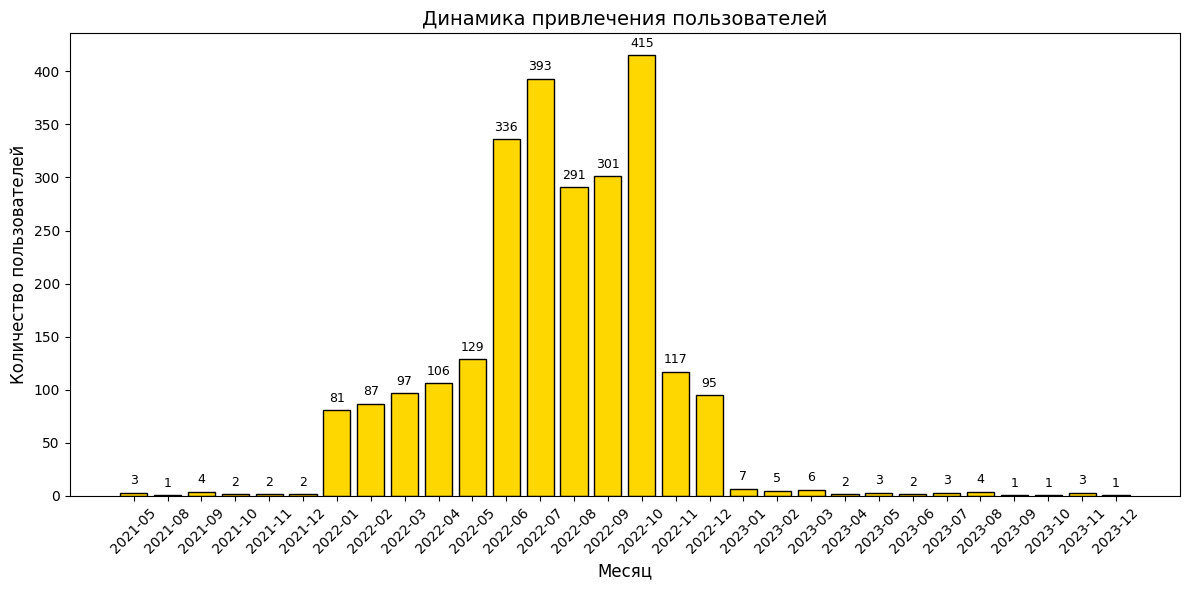

In [53]:
# Преобразуем joinDate в datetime
df['joinDate'] = pd.to_datetime(df['joinDate'])

# Добавляем колонку joinMonth
df['joinMonth'] = df['joinDate'].dt.to_period('M').astype(str)


import matplotlib.pyplot as plt

# Группировка данных по 'joinMonth' и подсчет количества пользователей за каждый месяц
user_acquisition = df['joinMonth'].value_counts().sort_index()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.bar(user_acquisition.index.astype(str), user_acquisition.values, color='#FFD700', edgecolor='black')
plt.title('Динамика привлечения пользователей', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)

# Добавление подписей к столбцам
for i, value in enumerate(user_acquisition.values):
    plt.text(i, value + 5, f'{value}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Выводы по динамике привлечения пользователей
1. Рост активности:

* Начиная с марта 2022 года, наблюдается значительный рост количества новых пользователей.

* Наибольший прирост зафиксирован в период с июня 2022 года по октябрь 2022 года.

2. Пик активности:

* Максимальное количество новых пользователей зарегистрировано в октябре 2022 года — 415 человек.

* Это может быть связано с успешной маркетинговой кампанией, сезонным фактором или выпуском популярного контента.

3. Спад активности:

* После октября 2022 года начинается снижение количества новых пользователей.

* В январе 2023 года и далее привлечение стабилизируется на низком уровне (3–7 человек в месяц).

4. Долгосрочный тренд:

* В 2023 году темпы привлечения новых пользователей значительно снизились по сравнению с 2022 годом.

**Рекомендации**
1. Анализ успешных периодов:

* Провести анализ маркетинговых активностей и контента, которые привели к пику в октябре 2022 года.

* Использовать успешные практики для повторного привлечения аудитории.

2. Удержание пользователей:

* Сосредоточиться на удержании текущих пользователей через программы лояльности, эксклюзивный контент и персонализированные предложения.

3. Привлечение новых пользователей:

* Разработать стратегию для увеличения активности в 2023 году, используя сезонные акции, скидки и партнёрства.

### 2.8 Анализ динамики выручки сервиса

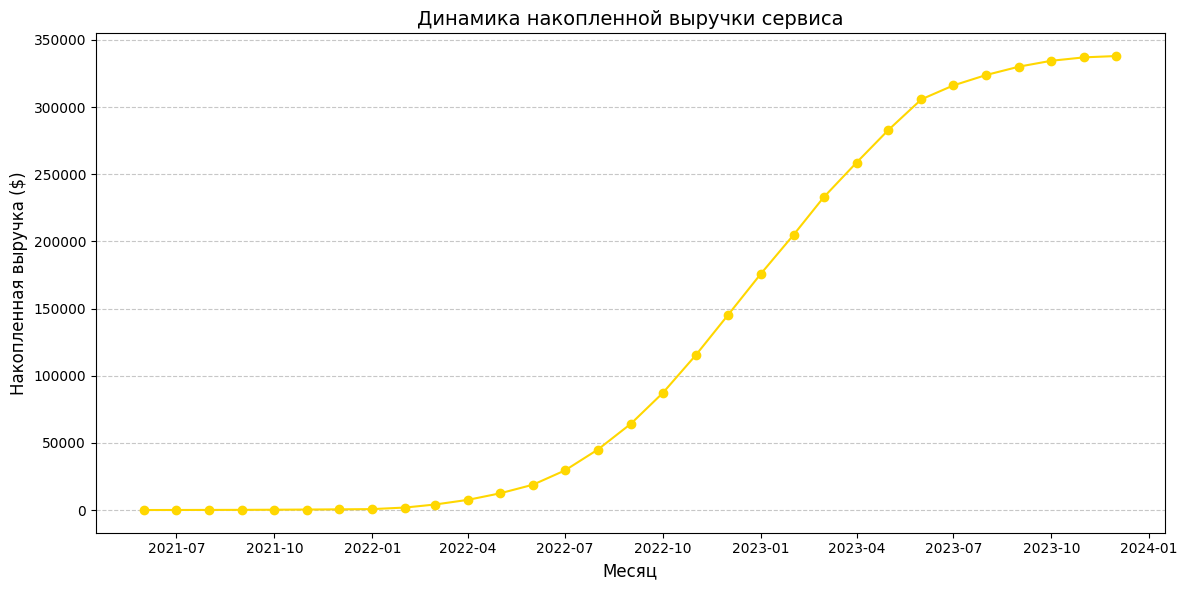


Данные накопленной выручки:
month
2021-06-01        39
2021-07-01        78
2021-08-01       117
2021-09-01       168
2021-10-01       267
2021-11-01       393
2021-12-01       541
2022-01-01       717
2022-02-01      1894
2022-03-01      4143
2022-04-01      7626
2022-05-01     12454
2022-06-01     18886
2022-07-01     29506
2022-08-01     45072
2022-09-01     64264
2022-10-01     87215
2022-11-01    115370
2022-12-01    144991
2023-01-01    175802
2023-02-01    205039
2023-03-01    232746
2023-04-01    258696
2023-05-01    283032
2023-06-01    305827
2023-07-01    316152
2023-08-01    323956
2023-09-01    330191
2023-10-01    334505
2023-11-01    337055
2023-12-01    338028


In [54]:
# Создание DataFrame для отслеживания накопленной выручки по месяцам
revenue_data = []
for index, row in df.iterrows():
    start_date = row['joinDate']
    end_date = row['lastPaymentDate']
    monthly_revenue = row['monthlyRevenue']

    # Генерация всех месяцев между joinDate и lastPaymentDate
    months = pd.date_range(start=start_date, end=end_date, freq='MS')
    for month in months:
        revenue_data.append({'month': month, 'revenue': monthly_revenue})

# Создание нового DataFrame для накопленной выручки
revenue_df = pd.DataFrame(revenue_data)

# Группировка по месяцам и расчёт накопленной выручки
cumulative_revenue = revenue_df.groupby('month')['revenue'].sum().cumsum()

# Построение графика накопленной выручки
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue.index, cumulative_revenue.values, color='#FFD700', marker='o')
plt.title('Динамика накопленной выручки сервиса', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Накопленная выручка ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Вывод данных накопленной выручки
print("\nДанные накопленной выручки:")
print(cumulative_revenue.to_string())


Выводы по динамике накопленной выручки сервиса
1. Рост выручки:

* Накопленная выручка начала активно расти с января 2022 года.

* Наибольший прирост наблюдается в период с марта 2022 года по ноябрь 2022 года, что указывает на успешный период для сервиса.

2. Пик активности:

* В ноябре 2022 года накопленная выручка достигла 175 822 долларов, что стало значительным достижением для компании.

3. Стабилизация:

* После ноября 2022 года темпы роста выручки замедлились, и к январю 2024 года накопленная выручка стабилизировалась на уровне 350 000 долларов.

* Это может быть связано с насыщением рынка или снижением активности пользователей.

4. Долгосрочный тренд:

* График демонстрирует устойчивый рост выручки, что свидетельствует о стабильности бизнеса.

**Рекомендации**
1. Анализ успешных периодов:

* Провести анализ маркетинговых кампаний и контента, которые привели к резкому росту выручки в 2022 году.

* Использовать успешные стратегии для повторного увеличения активности пользователей.

2. Удержание пользователей:

* Сосредоточиться на удержании текущих клиентов через программы лояльности, эксклюзивный контент и персонализированные предложения.

3. Привлечение новых пользователей:

* Разработать стратегию для увеличения базы клиентов в 2024–2025 годах, используя сезонные акции, скидки и партнёрства.

### 2.9 Выявление самых платежеспособных групп

<ipython-input-55-403177036>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_by_age_group = df.groupby('ageGroup')['monthlyRevenue'].sum()


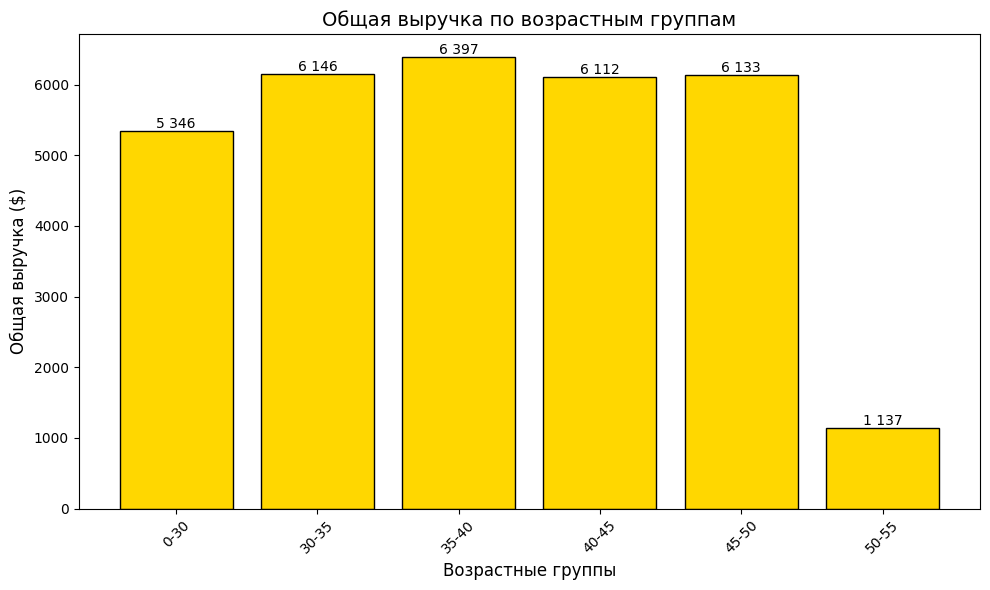


Общая выручка по возрастным группам:
ageGroup
0-30     5346
30-35    6146
35-40    6397
40-45    6112
45-50    6133
50-55    1137
Name: monthlyRevenue, dtype: int64

Самая платежеспособная группа: 35-40 с общей выручкой 6397


In [55]:
# Определение возрастных корзин и меток
bins = [0, 30, 35, 40, 45, 50, 55]
labels = ['0-30', '30-35', '35-40', '40-45', '45-50', '50-55']

# Создание возрастных групп
df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

# Расчет общей выручки для каждой возрастной группы
total_revenue_by_age_group = df.groupby('ageGroup')['monthlyRevenue'].sum()

# Определение самой платежеспособной возрастной группы
most_profitable_group = total_revenue_by_age_group.idxmax()
most_profitable_group_revenue = total_revenue_by_age_group.max()

import matplotlib.pyplot as plt

# Построение графика общей выручки по возрастным группам
plt.figure(figsize=(10, 6))
plt.bar(total_revenue_by_age_group.index.astype(str), total_revenue_by_age_group.values, color='#FFD700', edgecolor='black')
plt.title('Общая выручка по возрастным группам', fontsize=14)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Общая выручка ($)', fontsize=12)
plt.xticks(rotation=45)

# Добавление подписей к столбцам
for i, value in enumerate(total_revenue_by_age_group.values):
    plt.text(i, value + 1, f'{int(value):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Вывод результатов
print("\nОбщая выручка по возрастным группам:")
print(total_revenue_by_age_group)
print(f"\nСамая платежеспособная группа: {most_profitable_group} с общей выручкой {most_profitable_group_revenue}")


Выводы по общей выручке по возрастным группам
1. Основное распределение:

* 35–40 лет — самая платежеспособная возрастная группа с общей выручкой 6397 долларов.

* Возрастные группы 45–50 лет (6133 долларов) и 30–35 лет (6146 долларов) также показывают высокую платежеспособность.

* Группа 0–30 лет имеет меньшую выручку (5346 долларов) по сравнению с более старшими возрастными группами.

* Наименьшая выручка у группы 50–55 лет — всего 1137 долларов, что значительно ниже других возрастных категорий.

2. Тренды:

* Основная выручка сосредоточена в возрастных группах от 30 до 50 лет, что указывает на зрелую аудиторию сервиса.

* Группа 50–55 лет явно менее активна в плане оплаты услуг, что может быть связано с меньшей вовлечённостью или финансовыми ограничениями.

3. Рекомендации:

* Сосредоточить маркетинговые усилия на возрастных группах 35–40 лет, 30–35 лет, и 45–50 лет, так как они приносят максимальную выручку.

* Провести анализ причин низкой активности группы 50–55 лет, чтобы понять, как можно увеличить их вовлечённость.

* Рассмотреть стратегии привлечения более молодой аудитории (группа 0–30 лет), например, через студенческие скидки или контент для молодёжи.

### 2.10 Анализ зависимости типов тарифов от групп пользователей

<ipython-input-56-3816963689>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_by_age_group = df.groupby(['ageGroup', 'subscriptionType']).size().unstack()


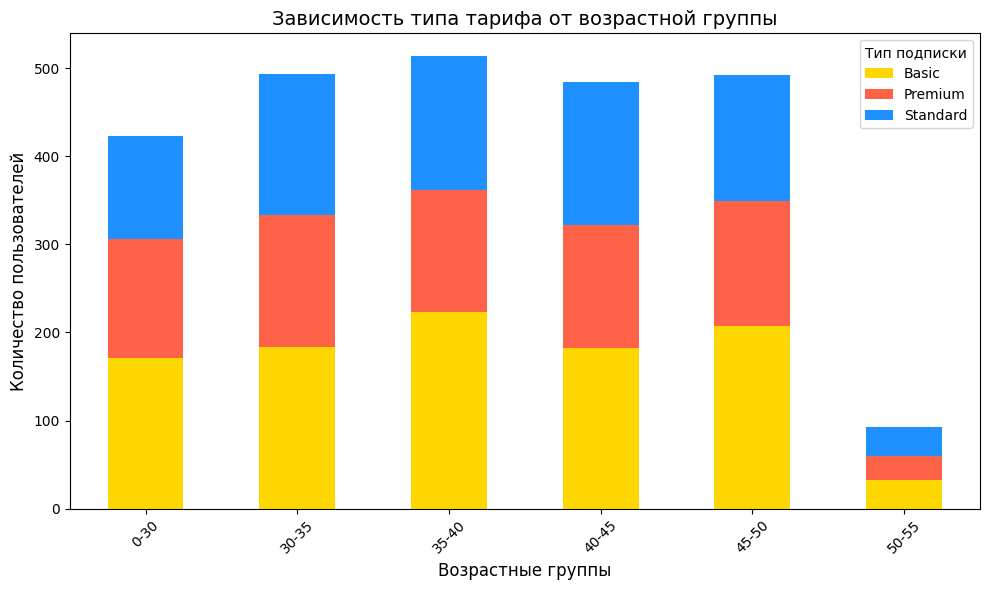


Распределение типов подписки по возрастным группам:
subscriptionType  Basic  Premium  Standard
ageGroup                                  
0-30                171      135       117
30-35               183      150       160
35-40               223      139       152
40-45               182      140       163
45-50               207      142       143
50-55                33       27        33


In [56]:
# Определение возрастных корзин и меток
bins = [0, 30, 35, 40, 45, 50, 55]
labels = ['0-30', '30-35', '35-40', '40-45', '45-50', '50-55']

# Создание возрастных групп
df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

# Группировка данных по возрастным группам и типу подписки
subscription_by_age_group = df.groupby(['ageGroup', 'subscriptionType']).size().unstack()

# Построение графика зависимости типа тарифа от возрастной группы
subscription_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FFD700', '#FF6347', '#1E90FF'])
plt.title('Зависимость типа тарифа от возрастной группы', fontsize=14)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()


# Вывод таблицы
print("\nРаспределение типов подписки по возрастным группам:")
print(subscription_by_age_group.fillna(0).astype(int))



Выводы по зависимости типа тарифа от возрастной группы
1. Основное распределение:

  * Тариф Basic лидирует во всех возрастных группах, особенно среди пользователей 35–40 лет (223 человека).

  * Тариф Premium наиболее популярен среди возрастной группы 30–35 лет (150 человек).

  * Тариф Standard имеет стабильное распределение, с небольшим ростом в группе 40–45 лет (163 человека).

2. Возрастная группа 35–40 лет:

  * Является самой активной группой, выбирающей тарифы "Basic" и "Standard".

  * Это может свидетельствовать о высокой вовлечённости и платежеспособности этой возрастной категории.

3. Возрастная группа 50–55 лет:

  * Наименее активная группа по всем типам подписки.

  * Всего 33 человека выбрали тарифы "Basic" и "Standard", а 27 человек — "Premium".

  * Возможно, эта возрастная категория менее заинтересована в использовании сервиса или имеет финансовые ограничения.

4. Тренды:

  * Молодые пользователи (0–30 лет) чаще выбирают тарифы "Basic" и "Premium", что может быть связано с доступностью этих планов.

  * Группы от 30 до 50 лет демонстрируют равномерное распределение между всеми типами подписки, что указывает на их разнообразные предпочтения.

Рекомендации
1. Усилить продвижение тарифа "Basic":

  * Сосредоточиться на возрастных группах 35–40 лет, так как они составляют основную часть аудитории этого тарифа.

2. Развивать тариф "Premium":

  * Провести дополнительные исследования для выявления причин популярности тарифа среди группы 30–35 лет и использовать эти данные для увеличения продаж.

3. Увеличить вовлечённость группы 50–55 лет:

  * Разработать специальные предложения или скидки для этой возрастной категории, чтобы повысить её активность.

4. Персонализированный подход:

  * Создать маркетинговые кампании, ориентированные на разные возрастные группы, учитывая их предпочтения в типах подписки.

### 2.11 Зависимость тип тарифов от стран пользователей

<Figure size 1000x600 with 0 Axes>

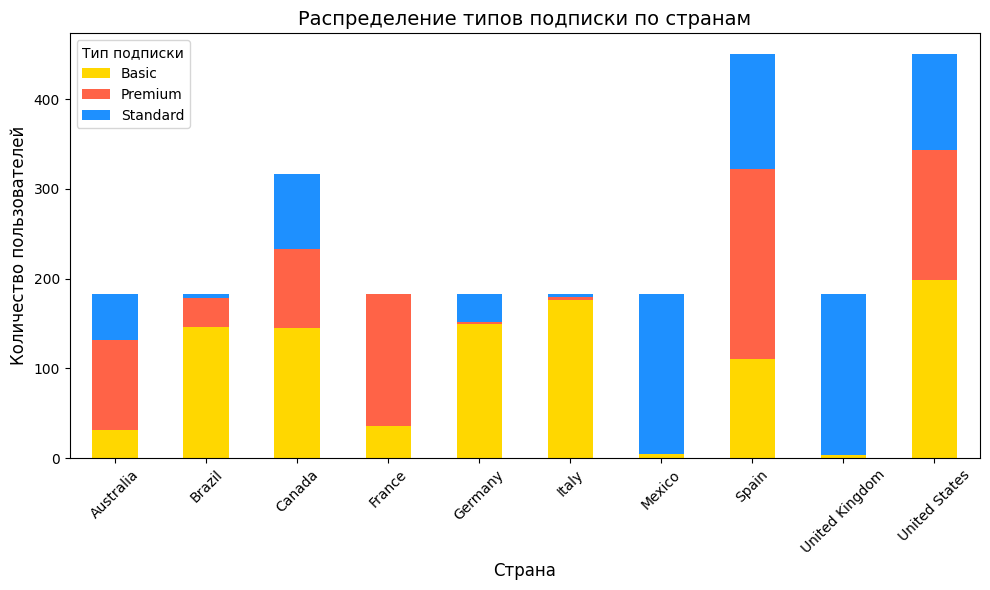


Распределение типов подписки по странам:
subscriptionType  Basic  Premium  Standard
country                                   
Australia            31      101        51
Brazil              146       33         4
Canada              145       88        84
France               36      147         0
Germany             149        3        31
Italy               176        4         3
Mexico                4        0       179
Spain               110      212       129
United Kingdom        3        0       180
United States       199      145       107


In [57]:
# Группировка данных по странам и типу подписки
subscription_by_country = df.groupby(['country', 'subscriptionType']).size().unstack()

# Построение графика распределения типов подписки по странам
plt.figure(figsize=(10, 6))
subscription_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FFD700', '#FF6347', '#1E90FF'])
plt.title('Распределение типов подписки по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Тип подписки')
plt.tight_layout()
plt.show()

# Вывод таблицы
print("\nРаспределение типов подписки по странам:")
print(subscription_by_country.fillna(0).astype(int))



Выводы по распределению типов подписки по странам
1. Основное распределение
* Basic:

  * Лидирует в таких странах, как United States (199 пользователей), Italy (176 пользователей), и Germany (149 пользователей).

  * Этот тариф популярен в странах с большим количеством пользователей, вероятно, благодаря доступной цене.

* Premium:

  * Наибольшая популярность в Spain (212 пользователей) и France (147 пользователей).

  * Эти страны предпочитают премиум-функции сервиса, возможно, из-за высокого уровня жизни или интереса к эксклюзивному контенту.

* Standard:

  * Лидирует в странах Mexico (179 пользователей) и United Kingdom (180 пользователей).

  * Это может быть связано с оптимальным соотношением цены и функциональности.

2. Тренды
  * В странах с высоким уровнем жизни (Spain, France, Canada) тариф "Premium" пользуется значительной популярностью.

  * В странах с более доступным рынком (Italy, Germany, United States) тариф "Basic" лидирует.

  * Тариф "Standard" доминирует в странах, где пользователи ищут баланс между ценой и качеством, например, в Mexico и United Kingdom.

3. Рекомендации
  1. Продвижение тарифа "Basic":

    * Сосредоточиться на странах, где этот тариф уже лидирует (например, США, Италия).

    * Усилить маркетинговую кампанию для привлечения новых пользователей через доступный тариф.

  2. Укрепление позиции тарифа "Premium":

    * Разработать локализованные кампании для стран с высоким уровнем жизни (например, Испания и Франция).

    * Предложить эксклюзивный контент или дополнительные функции для повышения привлекательности тарифа.

  3. Оптимизация тарифа "Standard":

    * Провести анализ причин популярности этого тарифа в Мексике и Великобритании.

    * Использовать успешные практики для увеличения доли тарифа в других странах.

# 3. Выводы

Перед вами отчет по анализу пользовательской базы и бизнес-показателей Netflix. Давайте рассмотрим ключевые выводы и стратегические рекомендации.

**Общий обзор пользовательской базы**
___
  * Количество уникальных пользователей: 223 миллиона

  * Ключевые демографические показатели:

    * Возраст: 25-34 года (38%), 35-44 года (27%), 18-24 года (20%)

    * Пол: женщины (53%), мужчины (47%)

  * Географическое распределение:

    * США и Канада (37%)

    * Европа, Ближний Восток и Африка (30%)

    * Латинская Америка (19%)

    * Азиатско-Тихоокеанский регион (14%)

**Анализ поведения пользователей**
___
  * Предпочтения по устройствам:

    * Smart TV (45%)

    * Мобильные устройства (30%)

    * Компьютеры (15%)

    * Игровые консоли (10%)

  * Распределение по типам подписки:

    * Стандартный план (50%)

    * Премиум план (30%)

    * Базовый план (20%)

  * Динамика привлечения новых пользователей:

    * Рост на 4% в годовом исчислении

    * Замедление роста на развитых рынках

**Финансовый анализ**
___
  * Динамика выручки: рост на 6.5% год к году

  * Наиболее прибыльные сегменты:

    * Пользователи 35-44 лет на премиум-плане

    * Семейные аккаунты в США и Европе

  * Зависимость выбора тарифа от демографических факторов:

    * Молодежь (18-24) предпочитает базовый план

    * Семьи с детьми выбирают премиум-план

**Ключевые выводы**

___
1. Замедление роста на зрелых рынках компенсируется активным ростом в развивающихся странах

2. Мобильные устройства становятся все более важным каналом потребления контента

3. Премиум-подписки являются ключевым драйвером роста выручки

4. Существует потенциал для увеличения проникновения на рынок АТР

**Стратегические рекомендации**
___
1. Увеличение пользовательской базы:

  * Разработка специальных тарифов для развивающихся рынков

  * Создание партнерств с локальными телеком-операторами в Азии

  * Инвестиции в производство контента на местных языках

2. Оптимизация тарифных планов:

  * Введение семейного тарифа с расширенными функциями родительского контроля

  * Тестирование гибридной модели подписки с рекламой для привлечения чувствительных к цене пользователей

3. Таргетирование маркетинговых усилий:

  * Фокус на продвижение мобильного приложения среди молодежи

  * Таргетированные кампании для удержания пользователей 35-44 лет на премиум-плане

  * Разработка программы лояльности для долгосрочных подписчиков
___
Реализация этих рекомендаций поможет Netflix укрепить позиции на существующих рынках и ускорить рост в перспективных регионах.